# Code vectorization
## 1. Introducion

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import random
from IPython.display import HTML, display
%run talktools.py

In [24]:
def add_python(Z1,Z2):
    return [z1+z2 for (z1,z2) in zip(Z1,Z2)]

def add_numpy(Z1, Z2):
    return np.add(Z1,Z2)

In [ ]:
Z2 = random.sample(range(1000), 100)
Z1 = random.sample(range(1000), 100)
print(add_numpy(Z1,Z2))
%timeit("add_numpy(Z1,Z2)",globals())


In [37]:
%timeit("add_numpy(Z1,Z2)",globals())

70.4 ns ± 0.737 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Not only is the second approach faster, but it also naturally adapts to the shape of Z1 and Z2. This is the reason why we did not write Z1 + Z2 because it would not work if Z1 and Z2 were both lists. In the first Python method, the inner + is interpreted differently depending on the nature of the two objects such that if we consider two nested lists, we get the following outputs:

In [ ]:
Z1 = [[1, 2], [3, 4]]
Z2 = [[5, 6], [7, 8]]
print("Z1+Z2:", Z1+Z2)
print ("add_python:", add_python(Z1, Z2))
print ("add_numpy:", add_numpy(Z1, Z2))

The first method concatenates the two lists together, the second method concatenates the internal lists together and the last one computes what is (numerically) expected. 

## 2. Uniform vectorization
Uniform vectorization is the simplest form of vectorization where all the elements share the same computation at every time step with no specific processing for any element. One stereotypical case is the Game of Life that has been invented by John Conway (see below) and is one of the earliest examples of cellular automata. Those cellular automata can be conveniently regarded as an array of cells that are connected together with the notion of neighbours and their vectorization is straightforward. Let me first define the game and we'll see how to vectorize it.    

<figure>
<img  src=http://www.labri.fr/perso/nrougier/from-python-to-numpy/data/Textile-Cone-cropped.jpg>
    <figcaption>Conus textile snail exhibits a cellular automaton pattern on its shell. Image by <a href="https://commons.wikimedia.org/wiki/File:Textile_cone.JPG">Richard Ling</a> 2005.</figcaption>
</figure>
    


The Game of Life is a cellular automaton. The "game" is actually a zero-player game, meaning that its evolution is determined by its initial state, needing no input from human players. One interacts with the Game of Life by creating an initial configuration and observing how it evolves.

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:
    
    1. Any live cell with fewer than two live neighbours dies, as if by needs caused by underpopulation.
    2. Any live cell with more than three live neighbours dies, as if by overcrowding.
    3. Any live cell with two or three live neighbours lives, unchanged, to the next generation.
    4. Any dead cell with exactly three live neighbours becomes a live cell.
    
The initial pattern constitutes the 'seed' of the system. The first generation is created by applying the above rules simultaneously to every cell in the seed – births and deaths happen simultaneously, and the discrete moment at which this happens is sometimes called a tick. (In other words, each generation is a pure function of the one before.) The rules continue to be applied repeatedly to create further generations.    

In [ ]:
# %load 04_vectorization.py
#!/usr/bin/env python
# @Date    : 2018-01-02 11:17:27
# @Author  : Your Name

"""a celluar automation algorithem: the evolution is determined by the initial
state, needing no inputs.

Any live cell with fewer than two live neighbours dies, as if by needs caused by underpopulation.
Any live cell with more than three live neighbours dies, as if by overcrowding.
Any live cell with two or three live neighbours lives, unchanged, to the next generation.
Any dead cell with exactly three live neighbours becomes a live cell.
"""
import numpy as np
import os
import sys

"""taking the border into account,
count the neighbours
"""

def compute_neighbours(Z):
    shape = (len(Z), len(Z[0]))
    N = [[0,]*(shape[0]) for i in range(shape[1])]
    for x in range(1, shape[0]-1):
        for y in range(1, shape[1]-1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                    + Z[x-1][y]            +Z[x+1][y]   \
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]

    return N
#############################################################
"""
count the number of neighbours for each internal cell"""
def iterate(Z):
    N=compute_neighbours(Z)
    shape = (len(Z), len(Z[0]))
    for x in range(1, shape[0]-1):
        for y in range(1, shape[1]):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and Z[x][y]==3:
                Z[x][y] = 1
    return Z

###############################################

"""
give the value of the running times and print the output"""

def output(Z, times):
    for i in range(0, int(times)): print (i+1, iterate(Z))

#if __name__ == "__main__":
  #  times=sys.argv[1]


Z = [[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],]

output(Z, times=5)

In [ ]:

z = np.array([[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],])
# Flatten arrays
#N=compute_neighbours(z)
n = np.zeros(z.shape, dtype=int)

n[1:-1,1:-1] += (z[ :-2, :-2] + z[ :-2,1:-1] + z[ :-2,2:] +
                 z[1:-1, :-2]                + z[1:-1,2:] +
                 z[2:  , :-2] + z[2:  ,1:-1] + z[2:  ,2:])
n_ =n.ravel()
z_ =z.ravel()
# Apply Rules
R1=np.argwhere((z_ == 1) &(n_ < 2))
R2=np.argwhere((z_ == 1) &(n_ > 3))
R3=np.argwhere( (z_ == 1) & ( (n_== 3) | (n_==2) ) )
R4=np.argwhere( (z_ == 0) & (n_ == 3) )
# Set new values
z_[R1] = 0
z_[R2] = 0
z_[R3] = z_[R3]
z_[R4] = 1
# Make sure borders stay null
z[0,:] = z[-1,:] = z[:,0] = z[:,-1] = 0

birth = (n==3)[1:-1,1:-1] & (z[1:-1,1:-1]==0)
survive = ((n==2) | (n==3))[1:-1,1:-1] & (z[1:-1,1:-1]==1)
z[...] = 0
z[1:-1,1:-1][birth | survive] = 1
n = np.zeros(z.shape, dtype=int)
n[1:-1, 1:-1] += (z[ :-2, :-2] + z[ :-2,1:-1] + z[ :-2,2:] +
                            z[1:-1, :-2]                + z[1:-1,2:] +
                             z[2:  , :-2] + z[2:  ,1:-1] + z[2:  ,2:])



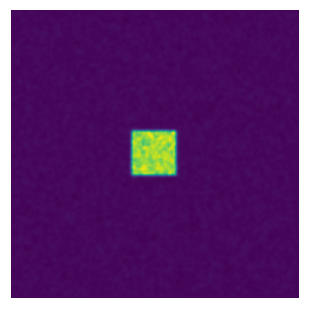

In [25]:
#import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Parameters from http://www.aliensaint.com/uo/java/rd/
# -----------------------------------------------------
n = 256
Du, Dv, F, k = 0.16, 0.08, 0.035, 0.065  # Bacteria 1
# Du, Dv, F, k = 0.14, 0.06, 0.035, 0.065  # Bacteria 2
# Du, Dv, F, k = 0.16, 0.08, 0.060, 0.062  # Coral
# Du, Dv, F, k = 0.19, 0.05, 0.060, 0.062  # Fingerprint
# Du, Dv, F, k = 0.10, 0.10, 0.018, 0.050  # Spirals
# Du, Dv, F, k = 0.12, 0.08, 0.020, 0.050  # Spirals Dense
# Du, Dv, F, k = 0.10, 0.16, 0.020, 0.050  # Spirals Fast
# Du, Dv, F, k = 0.16, 0.08, 0.020, 0.055  # Unstable
# Du, Dv, F, k = 0.16, 0.08, 0.050, 0.065  # Worms 1
# Du, Dv, F, k = 0.16, 0.08, 0.054, 0.063  # Worms 2
# Du, Dv, F, k = 0.16, 0.08, 0.035, 0.060  # Zebrafish

Z = np.zeros((n+2, n+2), [('U', np.double),
                          ('V', np.double)])
U, V = Z['U'], Z['V']
u, v = U[1:-1, 1:-1], V[1:-1, 1:-1]

r = 20
u[...] = 1.0
U[n//2-r:n//2+r, n//2-r:n//2+r] = 0.50
V[n//2-r:n//2+r, n//2-r:n//2+r] = 0.25
u += 0.05*np.random.uniform(-1, +1, (n, n))
v += 0.05*np.random.uniform(-1, +1, (n, n))


def update(frame):
    global U, V, u, v, im

    for i in range(10):
        Lu = (                  U[0:-2, 1:-1] +
              U[1:-1, 0:-2] - 4*U[1:-1, 1:-1] + U[1:-1, 2:] +
                                U[2:  , 1:-1])
        Lv = (                  V[0:-2, 1:-1] +
              V[1:-1, 0:-2] - 4*V[1:-1, 1:-1] + V[1:-1, 2:] +
                                V[2:  , 1:-1])
        uvv = u*v*v
        u += (Du*Lu - uvv + F*(1-u))
        v += (Dv*Lv + uvv - (F+k)*v)

    im.set_data(V)
    im.set_clim(vmin=V.min(), vmax=V.max())

fig = plt.figure(figsize=(4, 4))
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.viridis)
plt.xticks([]), plt.yticks([])
animation = FuncAnimation(fig, update, interval=10, frames=2000)
#animation.save('gray-scott-1.mp4', fps=40, dpi=80, bitrate=-1, codec="libx264",
  #              extra_args=['-pix_fmt', 'yuv420p'],
    #            metadata={'artist':'Ji Xia'})
plt.show()


- [John Conway new solitaire game "life"](https://web.archive.org/web/20090603015231/http://ddi.cs.uni-potsdam.de/HyFISCH/Produzieren/lis_projekt/proj_gamelife/ConwayScientificAmerican.htm), Martin Gardner, Scientific American 223, 1970.
- [Gray Scott Model of Reaction Diffusion](http://groups.csail.mit.edu/mac/projects/amorphous/GrayScott/), Abelson, Adams, Coore, Hanson, Nagpal, - Sussman, 1997.
- [Reaction-Diffusion by the Gray-Scott Model](http://mrob.com/pub/comp/xmorphia/), Robert P. Munafo, 1996.